         lr    min_lr      loss     loss_scale  grad_norm  modis_loss  \
0  0.000006  0.000006  1.437034   32768.000000        inf    0.318758   
1  0.000006  0.000006  1.134110   59548.234181   3.655350    0.180095   
2  0.000006  0.000006  1.083142  107120.936724   2.792795    0.167269   
3  0.000006  0.000006  1.103210   76232.591366        inf    0.166135   
4  0.000006  0.000006  1.066493  108399.876996   2.200564    0.162051   

    s1_loss   s2_loss  modis_loss_weighted  s1_loss_weighted  \
0  0.644102  0.474175             0.318758          0.644102   
1  0.605395  0.348620             0.180095          0.605395   
2  0.578501  0.337371             0.167269          0.578501   
3  0.606465  0.330610             0.166135          0.606465   
4  0.575398  0.329044             0.162051          0.575398   

   s2_loss_weighted  weight_decay  epoch  n_parameters  
0          0.474175          0.05      0      93104976  
1          0.348620          0.05      1      93104976  
2    

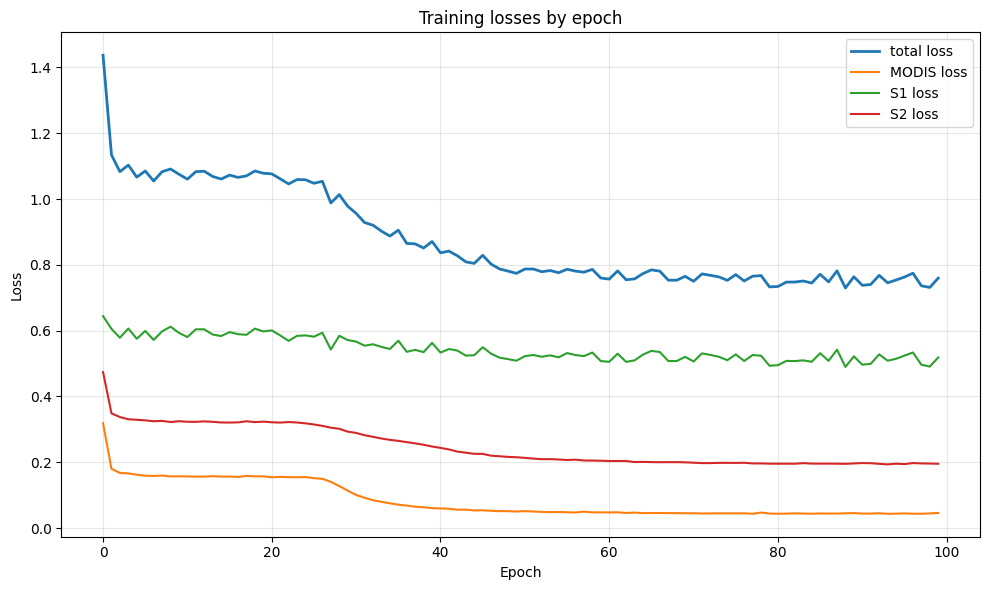

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --------------------------------------------------
# 1. 로그 로드 & DataFrame 생성
# --------------------------------------------------
log_path = Path("4/log.txt")          # 경로가 다르면 수정하세요

records = []
with log_path.open() as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        # JSON → dict
        rec = json.loads(line)
        # dict key들이 '[Epoch] loss' 처럼 돼있다면 깔끔하게 정리
        cleaned = {k.replace('[Epoch] ', ''): v for k, v in rec.items()}
        records.append(cleaned)

df = pd.DataFrame(records).sort_values("epoch").reset_index(drop=True)
print(df.head())

# --------------------------------------------------
# 2. 지표별 그래프
# --------------------------------------------------
plt.figure(figsize=(10, 6))

# 총 loss
plt.plot(df["epoch"], df["loss"], label="total loss", linewidth=2)

# 모달리티별 loss
plt.plot(df["epoch"], df["modis_loss"], label="MODIS loss")
plt.plot(df["epoch"], df["s1_loss"],    label="S1 loss")
plt.plot(df["epoch"], df["s2_loss"],    label="S2 loss")

plt.title("Training losses by epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 3. 필요하면 그래프 저장
# --------------------------------------------------
# plt.savefig("loss_curve.png", dpi=150)
